In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import csv
import datetime
from mpl_toolkits.basemap import Basemap
import urllib.request as urllib2

## Import earthquke data

In [16]:
eq_url = "https://raw.githubusercontent.com/kgo2105/Earthquake_lab/master/nm_eqs.txt"
response = urllib2.urlopen(eq_url)
data = np.loadtxt(response, delimiter= '\t')

date = [int(row[0]) for row in data]
lat = [row[1] for row in data]
lon = [row[2] for row in data]
depth = [row[3] for row in data]
mag = [row[4] for row in data]

## Import geographic data to draw map

In [21]:
ssa_url = "https://raw.githubusercontent.com/kgo2105/Earthquake_lab/master/socorro_outline.txt"
response = urllib2.urlopen(ssa_url)
ssa = np.loadtxt(response, delimiter= ',')

# Coordinates of the Socorro Seismic Anomaly outline
ssa_lat = [row[1] for row in ssa]
ssa_lon = [row[0] for row in ssa]

In [23]:
type(ssa)

numpy.ndarray

In [51]:
topo_url = "https://raw.githubusercontent.com/kgo2105/Earthquake_lab/master/etopo1_bedrock.txt"
response = urllib2.urlopen(topo_url)

# Read header (number of columns and rows, cell-size, and lower left coordinates)
ncols = int(response.readline().split()[1])
nrows = int(response.readline().split()[1])
xllcorner = float(response.readline().split()[1])
yllcorner = float(response.readline().split()[1])
cellsize = float(response.readline().split()[1])

# Read in topography as a whole, disregarding first five rows (header)
etopo = np.loadtxt(response, skiprows = 0)

# Data resolution is quite high. I decrease the data resolution 
# to decrease the size of the final figure
dres = 2

# Swap the rows
etopo[:nrows+1, :] = etopo[nrows+1::-1, :]
etopo = etopo[::dres, ::dres]

# Create longitude and latitude vectors for etopo
lons = np.arange(xllcorner, xllcorner+cellsize*ncols, cellsize)[::dres]
lats = np.arange(yllcorner, yllcorner+cellsize*nrows, cellsize)[::dres]

In [49]:
print(etopo[0])

[1866. 1949. 1968. 1955. 1951. 1977. 1995. 2009. 2022. 2043. 1945. 1958.
 1953. 1870. 1871. 1818. 1818. 1947. 1909. 1804. 1774. 1865. 2126. 2043.
 1798. 1930. 1968. 2001. 1927. 1995. 2041. 2033. 2009. 1965. 1987. 2139.
 2231. 2183. 2085. 2027. 2156. 2151. 2144. 2130. 2112. 2086. 2094. 2094.
 2077. 2076. 2069. 2099. 2114. 2127. 2146. 2170. 2192. 2215. 2244. 2266.
 2258. 2114. 1988. 2139. 2145. 1999. 1959. 1910. 1864. 1828. 1760. 1774.
 1750. 1733. 1734. 1749. 1760. 1787. 1819. 1888. 1974. 2031. 2141. 2176.
 2192. 2250. 2287. 2161. 2134. 2122. 2118. 2153. 2240. 2401. 2599. 2624.
 2623. 2577. 2417. 2386. 2408. 2407. 2429. 2495. 2534. 2550. 2632. 2670.
 2520. 2560. 2633. 2644. 2626. 2630. 2739. 2812. 2812. 2507. 2388. 2528.
 2536. 2783. 3124. 3199. 3491. 3164. 3470. 3544. 3592. 3857. 3849. 3534.
 3792. 3858. 3843. 3789. 3505. 3253. 2849. 2986. 2787. 3054. 3327. 3516.
 3750. 3776. 3719. 3771. 3696. 3803. 3776. 3332. 3126. 3268. 3466. 3634.
 3652. 3538. 3077. 3306. 3234. 3175. 2789. 3038. 32

# Draw the map

/srv/conda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/srv/conda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


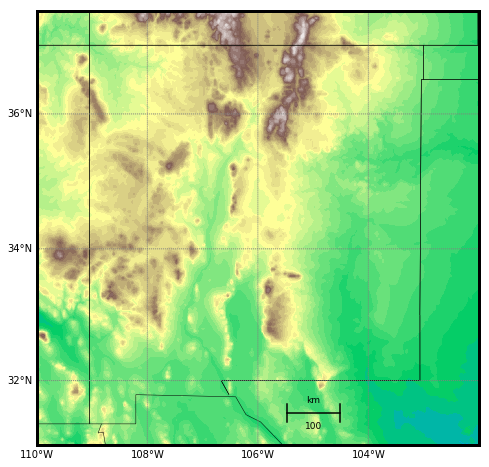

In [61]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))

#not using these two lines of code
# mapfig, myAx = plt.subplots()
# myAx.plot([1,2,3])


m = Basemap(llcrnrlon=-110.,llcrnrlat=31.,urcrnrlon=-102.,urcrnrlat=37.5,\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)

# Convert etopo1 coordinates lon/lat in ° to x/y in m
# (From the basemap help: Calling a Basemap class instance with the arguments
# lon, lat will convert lon/lat (in degrees) to x/y map projection coordinates
# (in meters).)
rlons, rlats = m(*np.meshgrid(lons,lats))

# Draw etopo1, first for land and then for the ocean, with different colormaps
llevels = np.arange(-100,4100,100) # check etopo.ravel().max()
lcs = m.contourf(rlons, rlats, etopo, llevels, cmap=plt.cm.terrain)
olevels = np.arange(-3500,1,100) # check etopo.ravel().min()
cso = m.contourf(rlons, rlats, etopo, olevels, cmap=plt.cm.ocean)

# #m.shadedrelief()
m.drawstates(color = 'black')
m.drawcountries(color='black')
m.drawparallels(np.arange(30,40,2),labels=[1,0,0,0], color = 'grey')
m.drawmeridians(np.arange(-110,-102,2),labels=[0,0,0,1], color = 'grey')
# #m.fillcontinents(color='lightgrey',alpha = 0.5)
# m.scatter(lon,lat, latlon = True, s = 45)
# m.plot(ssa_lon,ssa_lat, latlon=True, color = 'r', linewidth = 1.5)

# # Draw a think border around the whole map
m.drawmapboundary(linewidth=3)

#scale
m.drawmapscale(-105, 31.5, -106, 32, 100, barstyle='simple', units='km', fontsize=9, yoffset=None, labelstyle='simple', fontcolor='k', fillcolor1='w', fillcolor2='k',format='%d')#%% Depth plot

%config InlineBackend.close_figures=False # keep figures open in pyplot

# Add latitude and longitude tick marks, and a scale

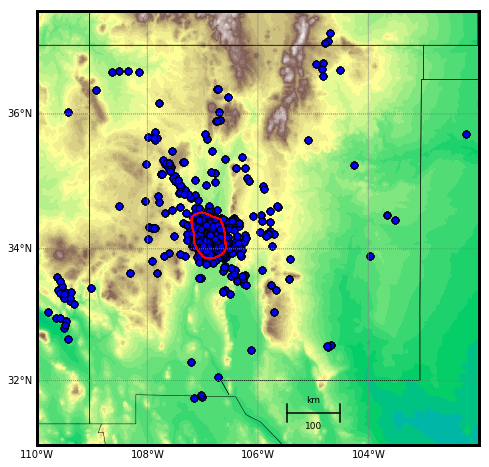

In [69]:

m.scatter(lon,lat, latlon = True, s = 45, edgecolor = 'black', facecolor = 'blue')
m.plot(ssa_lon,ssa_lat, latlon=True, color = 'r', linewidth = 1.5)


# Make some observations about data distribution

# Plot the earthquake data by depth

(20, 0)

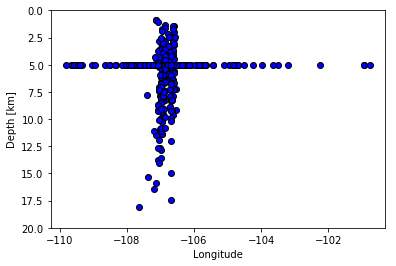

In [72]:
plt.figure()
plt.scatter(lon,depth, color = 'b', edgecolor = 'black')
plt.xlabel('Longitude')
plt.ylabel('Depth [km]')
plt.ylim(20,0)

# Make point about data quality check


Text here

Omit depths = 5 km


Text(0.5,0,'Longitude')

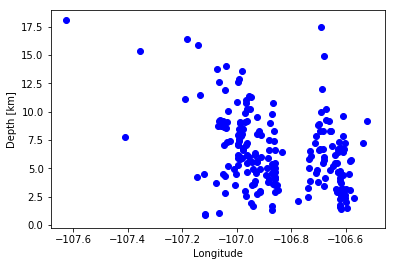

In [75]:
plt.figure()
for i in data:
    if i[3] != 5.0: #does not equal
        plt.scatter(i[2],i[3], color = 'blue')
plt.ylabel('Depth [km]')
plt.xlabel('Longitude')

# Plot by date

Text(0.5,0,'Year')

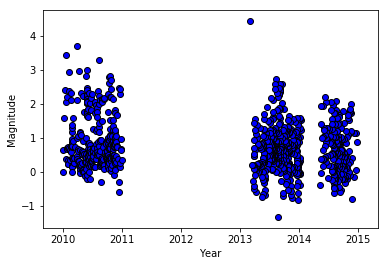

In [78]:
# Format dates
ymd = []
for i in range(len(date)):
    ymd.append(datetime.datetime.strptime(str(date[i]),'%Y%m%d'))

# plot of magnitude
plt.figure()
plt.scatter(ymd,mag, edgecolor = 'black',color = 'blue')
plt.ylabel('Magnitude')
plt.xlabel('Year')